In [7]:
# import libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='features')
df = df.fillna(value=0)
X = df[list(df.columns)[1:-2]]
y = df.iloc[:, -1]
X.head()

,lumo_1,homo_1,lumo_2,homo_2,lumo_3,homo_3,LUMO,HOMO,lumo5,homo5,...,h5-h4,h6-h5,wf-h6,ito-L1,l1-l2,l2-l3,l3-l4,l4-l5,l5-l6,l6-wf
0,2.30,5.30,2.5,5.2,2.4,5.9,2.70,5.60,2.50,6.5,...,0.90,-0.10,-2.90,2.40,-0.20,0.1,-0.30,0.20,-0.50,-0.50
1,3.56,6.26,2.4,6.1,0.0,0.0,2.40,6.10,3.47,7.5,...,1.40,0.00,-3.22,1.14,1.16,0.0,3.70,-1.07,0.00,-0.81
2,3.30,5.20,2.0,5.5,0.0,0.0,2.27,5.85,2.50,6.8,...,0.95,-0.60,-2.70,1.40,1.30,0.0,3.23,-0.23,-0.30,-0.70
3,3.30,5.20,2.0,5.5,0.0,0.0,2.28,5.80,2.50,6.8,...,1.00,-0.60,-2.70,1.40,1.30,0.0,3.22,-0.22,-0.30,-0.70
4,5.70,9.50,2.0,5.5,0.0,0.0,2.55,5.90,0.00,0.0,...,0.00,0.78,-2.38,-1.00,3.70,0.0,2.95,0.00,-0.18,-1.57


In [8]:
# preprocessing/scaling data/ standardization
X = preprocessing.scale(X)
y = preprocessing.scale(y)

# prepare models. here I used the model right away using the default parameter
regressor = []
# regressor.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)))
regressor.append(('LASS', Lasso(alpha=0.01)))
regressor.append(('RIDG', Ridge(fit_intercept=True, alpha=0.1)))
regressor.append(('GRB', GradientBoostingRegressor()))
regressor.append(('SVR', SVR(kernel='rbf')))
regressor.append(('KNN', KNeighborsRegressor()))
regressor.append(('DTR', DecisionTreeRegressor()))
regressor.append(('RFR', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []

# Calculate the r-squared for every algorithm (mean score of cross validated data)
for name, reg in regressor:
    kfold = KFold(n_splits=4, random_state=27)
    cv_results = cross_val_score(reg, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASS: -48.622585 (49.983794)
RIDG: -215.173002 (207.076593)
GRB: -52.104273 (64.439449)
SVR: -39.207673 (50.751880)
KNN: -60.372207 (84.564912)
DTR: -137.037433 (171.021819)
RFR: -72.213779 (89.769042)


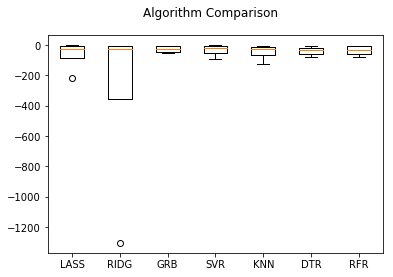

In [10]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
new_X = df[[ 'triplet2', 'homo6', 'HOMO', 'triplet3', 'wf-h6', 'lumo6','h5-h4','t6', 't2', 't5', 'thick']] 

X = preprocessing.minmax_scale(new_X)
y = preprocessing.minmax_scale(y)

# prepare models. here I used the model right away using the default parameter
regressor = []
# regressor.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)))
regressor.append(('LASS', Lasso(alpha=0.01)))
regressor.append(('RIDG', Ridge(fit_intercept=True, alpha=0.1)))
regressor.append(('GRB', GradientBoostingRegressor()))
regressor.append(('SVR', SVR(kernel='rbf')))
regressor.append(('KNN', KNeighborsRegressor()))
regressor.append(('DTR', DecisionTreeRegressor()))
regressor.append(('RFR', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []

# Calculate the r-squared for every algorithm (mean score of cross validated data)
for name, reg in regressor:
    kfold = KFold(n_splits=4, random_state=27)
    cv_results = cross_val_score(reg, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASS: -66.298628 (86.979186)
RIDG: -339.664683 (557.420609)
GRB: -27.798200 (19.073387)
SVR: -34.599576 (35.518015)
KNN: -45.720506 (47.163664)
DTR: -39.564797 (28.027102)
RFR: -36.475130 (30.879991)
